## Assignment

In this exercise, you'll predict house prices using your model. To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:


* Load the **housing prices** data from Thinkful's database.
* Split your data into train and test sets.
* Estimate your model from the previous checkpoint in the train set. Assess the goodness of fit of your model.
* Predict the house prices in the test set, and evaluate the performance of your model using the metrics we mentioned in this checkpoint.
* Is the performance of your model satisfactory? Why?
* Try to improve your model in terms of predictive performance by adding or removing some variables.

Please submit a link your work notebook. This is not a graded checkpoint, but you should discuss your solutions with your mentor. Also, when you're done, compare your work to [this example solution](https://github.com/Thinkful-Ed/machine-learning-regression-problems/blob/master/notebooks/6.solution_making_predictions.ipynb).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse
import matplotlib.pyplot as plt

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

import warnings
warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

In [2]:
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
df_houseprices = pd.read_sql_query('select * from houseprices',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()

In [3]:
df_houseprices.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.000,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000


In [4]:
num_cols = df_houseprices.select_dtypes(['int64', 'float64']).columns
non_numeric_columns = df_houseprices.select_dtypes(['object']).columns

In [5]:
df_houseprices = pd.concat([df_houseprices,pd.get_dummies(df_houseprices.mszoning, prefix="mszoning", drop_first=True)], axis=1)
df_houseprices = pd.concat([df_houseprices,pd.get_dummies(df_houseprices.street, prefix="street", drop_first=True)], axis=1)
dummy_column_names = list(pd.get_dummies(df_houseprices.mszoning, prefix="mszoning", drop_first=True).columns)
dummy_column_names = dummy_column_names + list(pd.get_dummies(df_houseprices.street, prefix="street", drop_first=True).columns)

In [6]:
X = df_houseprices[['overallqual', 'grlivarea', 'garagecars', 'garagearea', 'totalbsmtsf'] + dummy_column_names]
Y = df_houseprices.saleprice

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print("The number of observations in the training set is {}".format(X_train.shape[0]))
print("The number of observations in the test set is {}".format(X_test.shape[0]))

# We add constant to the model as it's a best practice
# to do so every time!
X_train = sm.add_constant(X_train)

# We fit an OLS model using statsmodels
results = sm.OLS(y_train, X_train).fit()

# We print the summary results
print(results.summary())

The number of observations in the training set is 1168
The number of observations in the test set is 292
                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     383.1
Date:                Tue, 30 Jun 2020   Prob (F-statistic):               0.00
Time:                        13:34:27   Log-Likelihood:                -13972.
No. Observations:                1168   AIC:                         2.797e+04
Df Residuals:                    1157   BIC:                         2.802e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

- R-squared is 0.768 and Adj R-squared is 0.766.
- AIC is 27970
- BIC is 28020 <br>
The goodness of fit is approximately .77, which suggests the model is decent but leaves room for improvement.

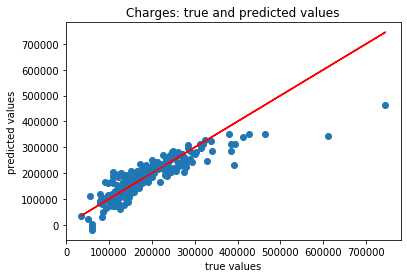

Mean absolute error of the prediction is: 25546.80382858886
Mean squared error of the prediction is: 1559083821.9730694
Root mean squared error of the prediction is: 39485.2354934483
Mean absolute percentage error of the prediction is: 15.551420347537784


In [8]:
# making predictions

# We add constant to the model as it's a best practice
# to do so every time!
X_test = sm.add_constant(X_test)

# We are making predictions here
y_preds = results.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

The model isn't bad at predicting house prices but there is still room for improvement. For example, there are some features that have high p-values and are not statistically significant. Let's also see if there are any features that could be explained in fewer columns.

In [9]:
df_houseprices.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,mosold,yrsold,saletype,salecondition,saleprice,mszoning_FV,mszoning_RH,mszoning_RL,mszoning_RM,street_Pave
0,1,60,RL,65.000,8450,Pave,None,Reg,Lvl,AllPub,...,2,2008,WD,Normal,208500,0,0,1,0,1
1,2,20,RL,80.000,9600,Pave,None,Reg,Lvl,AllPub,...,5,2007,WD,Normal,181500,0,0,1,0,1
2,3,60,RL,68.000,11250,Pave,None,IR1,Lvl,AllPub,...,9,2008,WD,Normal,223500,0,0,1,0,1
3,4,70,RL,60.000,9550,Pave,None,IR1,Lvl,AllPub,...,2,2006,WD,Abnorml,140000,0,0,1,0,1
4,5,60,RL,84.000,14260,Pave,None,IR1,Lvl,AllPub,...,12,2008,WD,Normal,250000,0,0,1,0,1


In [10]:
df_houseprices['totalsf'] = df_houseprices['totalbsmtsf'] + df_houseprices['firstflrsf'] + df_houseprices['secondflrsf']
df_houseprices['int_over_sf'] = df_houseprices['totalsf'] * df_houseprices['overallqual']

# X is the feature set
X = df_houseprices[['overallqual',  'garagecars', 'totalbsmtsf', 'mszoning_RL', 'totalsf', 'int_over_sf', 'lotarea']]
# Y is the target variable
Y = np.log(df_houseprices.saleprice)

In [11]:
X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

results = sm.OLS(y_train, X_train).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     786.5
Date:                Tue, 30 Jun 2020   Prob (F-statistic):               0.00
Time:                        13:34:28   Log-Likelihood:                 442.91
No. Observations:                1168   AIC:                            -869.8
Df Residuals:                    1160   BIC:                            -829.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          10.0339      0.056    179.636      0.000       9.924      10.144
overallqual     0.2055      0.009     22.431      0.000       0.188       0.224
garagecars      0.1041      0.009     12.214      0.000       0.087       0.121
totalbsmtsf -8.971e-05   1.97e-05     -4.547      0.000      -0.000    -5.1e-05
mszoning_RL     0.1277      0.013     10.181      0.000       0.103       0.152
totalsf         0.0004   2.45e-05     15.435      0.000       0.000       0.000
int_over_sf -2.742e-05   2.99e-06     -9.163      0.000   -3.33e-05   -2.15e-05
lotarea      2.237e-06   4.85e-07      4.607      0.000    1.28e-06    3.19e-06
==============================================================================
Omnibus:                      331.298   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1992.503
Skew:                          -1.168   Prob(JB):                         0.00
Kurtosis:                       8.957   Cond. No.                     2.60e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.6e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- R-squared is 0.826 and Adj R-squared is 0.825.
- AIC is -869.8
- BIC is -829.3 <br>
The goodness of fit increased and the performance scores are lower than the first model. This suggests the new feature set and log transformation of the target variable improved the model.

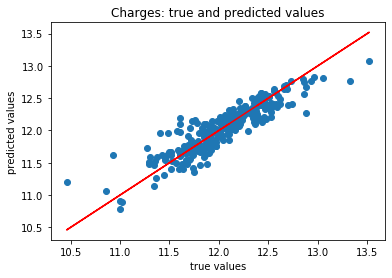

Mean absolute error of the prediction is: 0.12962979809885425
Mean squared error of the prediction is: 0.03148108893294334
Root mean squared error of the prediction is: 0.17742910959857555
Mean absolute percentage error of the prediction is: 1.084358281988467


In [12]:
# making predictions

# We add constant to the model as it's a best practice
# to do so every time!
X_test = sm.add_constant(X_test)

# We are making predictions here
y_preds = results.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

- The predictions from the test set suggest a significant improvement over the first model. 
- Each evaluation metric is drastically lower compared to the first model, which supports the observation.
- However, we are NOT comparing apples to apples since we took the log of the target variable. If we were to simply take the log of the target in the initial model, we'd find that the only evaluation metric that is improved in the second model is the mean absolute percentage error (MAPE). All of the other metrics are actually higher in the second model.
- In fact, by not changing ANY features for the model and ONLY take the log of the target, then we achieve an adjusted R-squared of .820. This second model is barely an improvement over the initial model. If we didn't take the log of the target in the second model, we could hardly interpret the second model is superior to the first.